<a href="https://colab.research.google.com/github/HanRyunKyeong/projectmanager/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_05(%EB%94%A5%EB%9F%AC%EB%8B%9D01).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#이미지 이항 분류

In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf

###손글씨 데이터 이항 분류

####데이터 받기

In [3]:
(x_train, y_train), (x_test, y_test) = \
     tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


####이미지 보기

In [4]:
from PIL import Image
Image.fromarray(x_train[0])  # 훈련용 이미지 0번을 그림으로 보기

In [5]:
y_train[0]  # 훈련용 이미지 0번의 숫자

5

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

###0과 1만 추리기

####두 개의 클래스만 추출해주는 함수

In [7]:
import numpy as np
def filter_dataset(x, y, neg_cls, pos_cls):
    # x와 y에서 neg_cls와 pos_cls만 추려내는 함수
    m = (y == pos_cls) | (y == neg_cls)
    x = x[m]
    y = y[m]
    y = np.where(y == neg_cls, 0, 1)
    return x, y

#0과 1만 추출
x_train2, y_train2 = filter_dataset(x_train, y_train, 0, 1)


In [8]:
y_train2

array([0, 1, 1, ..., 1, 0, 1])

In [9]:
Image.fromarray(x_train2[1])

###텐서플로 모형 정의

In [10]:
from tensorflow.keras.layers import *
model = tf.keras.Sequential([
  Flatten(),                          #이미지를 평평하게
  Dense(1, activation='sigmoid'),     #dense1 = 1개만 출력
])

###설정

In [11]:
model.compile(loss='binary_crossentropy',     #loss = 예측이 부정확한 정도를 평가하는 방법
              metrics=['accuracy'])           #accuracy = 확률이 큰 쪽으로 예측하여 맞은 개수

###훈련

In [14]:
result = model.fit(x_train2, y_train2, validation_split=0.1, epochs=10)
#validation 0.1 = 10%를 중간 테스트에 사용 하겠다는 의미

Epoch 1/10
357/357 [==============================] - 1s 2ms/step - loss: 0.0084 - accuracy: 0.9992 - val_loss: 0.0452 - val_accuracy: 0.9984
Epoch 2/10
357/357 [==============================] - 1s 2ms/step - loss: 0.0061 - accuracy: 0.9994 - val_loss: 0.1159 - val_accuracy: 0.9968
Epoch 3/10
357/357 [==============================] - 1s 2ms/step - loss: 0.0116 - accuracy: 0.9992 - val_loss: 0.0231 - val_accuracy: 0.9992
Epoch 4/10
357/357 [==============================] - 1s 2ms/step - loss: 0.0049 - accuracy: 0.9996 - val_loss: 3.4371e-07 - val_accuracy: 1.0000
Epoch 5/10
357/357 [==============================] - 1s 2ms/step - loss: 0.0080 - accuracy: 0.9995 - val_loss: 0.0066 - val_accuracy: 0.9984
Epoch 6/10
357/357 [==============================] - 1s 2ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.0202 - val_accuracy: 0.9984
Epoch 7/10
357/357 [==============================] - 1s 2ms/step - loss: 3.2615e-04 - accuracy: 0.9998 - val_loss: 2.9359e-10 - val_accuracy: 1

###에포크에 따른 정확도 추이(그래프)

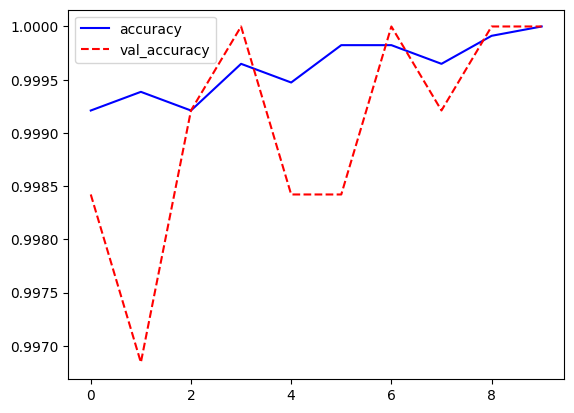

In [16]:
import matplotlib.pyplot as plt
plt.plot(result.history['accuracy'], 'b-', label='accuracy')
plt.plot(result.history['val_accuracy'], 'r--', label='val_accuracy')
plt.legend()

###에포크에 따른 손실 추이

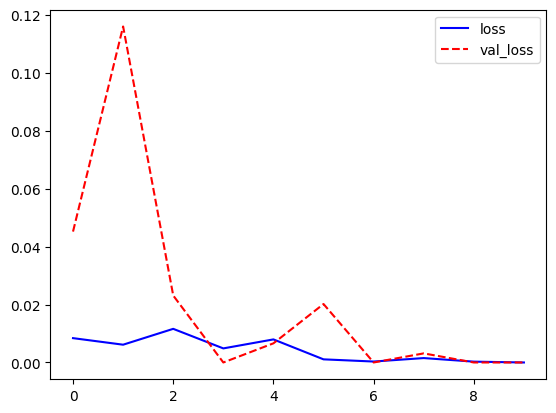

In [17]:
plt.plot(result.history['loss'], 'b-', label='loss')
plt.plot(result.history['val_loss'], 'r--', label='val_loss')
plt.legend()

###평가

In [18]:
#테스트 데이터에서 0과 1만 추리기
x_test2, y_test2 = filter_dataset(x_test, y_test, 0, 1)

#테스트 데이터로 평가
model.evaluate(x_test2, y_test2)

67/67 [==============================] - 0s 1ms/step - loss: 0.0175 - accuracy: 0.9986


[0.01749403588473797, 0.99858158826828]